In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df =pd.read_csv('penguins_lter.csv')

In [5]:
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [7]:
df.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

In [8]:
df.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


# Trying to check for any outliers

<AxesSubplot:xlabel='Culmen Length (mm)'>

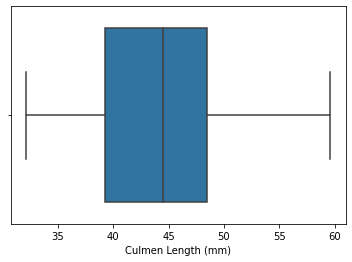

In [10]:
sns.boxplot(x='Culmen Length (mm)',data=df)

<AxesSubplot:xlabel='Culmen Depth (mm)'>

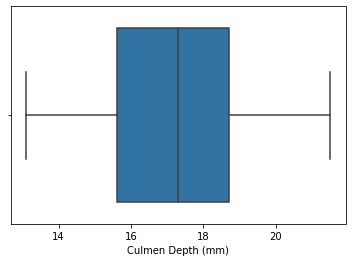

In [11]:
sns.boxplot(x='Culmen Depth (mm)',data=df)

<AxesSubplot:xlabel='Flipper Length (mm)'>

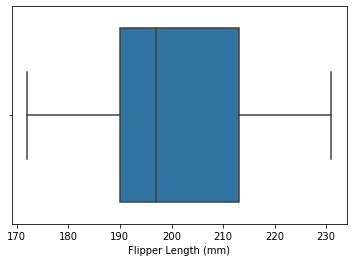

In [12]:
sns.boxplot(x='Flipper Length (mm)',data=df)

<AxesSubplot:xlabel='Body Mass (g)'>

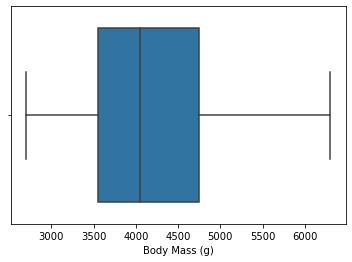

In [13]:
sns.boxplot(x='Body Mass (g)',data=df)

Conclusion -- No outliers. We can impute NaNs using Mean,Median and Mode without disturbing the integrity of the data

# Now working on the missing values 

In [20]:
mean1= df['Culmen Length (mm)'].mean()
mean2=df['Culmen Depth (mm)'].mean()
mean3=df['Flipper Length (mm)'].mean()
mean4=df['Body Mass (g)'].mean()

In [19]:
df.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments',
       'Culmen Length (mm)_mean'],
      dtype='object')

In [23]:
df['Culmen Length (mm)']=df['Culmen Length (mm)'].fillna(mean1)
df['Culmen Depth (mm)']=df['Culmen Depth (mm)'].fillna(mean2)
df['Flipper Length (mm)']=df['Flipper Length (mm)'].fillna(mean3)
df['Body Mass (g)']=df['Body Mass (g)'].fillna(mean4)

In [32]:
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.10000,18.70000,181.000000,3750.000000,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.50000,17.40000,186.000000,3800.000000,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.30000,18.00000,195.000000,3250.000000,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,43.92193,17.15117,200.915205,4201.754386,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.70000,19.30000,193.000000,3450.000000,FEMALE,8.76651,-25.32426,NaN


In [28]:
df.drop('Culmen Length (mm)_mean',axis=1,inplace=True)

In [33]:
df.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       0
Culmen Depth (mm)        0
Flipper Length (mm)      0
Body Mass (g)            0
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

In [34]:
pd.get_dummies(df['Sex']).head()

,.,FEMALE,MALE
0,0,0,1
1,0,1,0
2,0,1,0
3,0,0,0
4,0,1,0


In [36]:
from sklearn.impute import SimpleImputer
#setting strategy to 'most frequent' to impute by the mean
imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median 
df.iloc[:,:] = imputer.fit_transform(df)

In [37]:
df.isnull().sum()

studyName              0
Sample Number          0
Species                0
Region                 0
Island                 0
Stage                  0
Individual ID          0
Clutch Completion      0
Date Egg               0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
Comments               0
dtype: int64

In [46]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df["Sex"] = lb.fit_transform(df["Sex"])

In [47]:
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.10000,18.70000,181.000000,3750.000000,2,7.63220,-27.01854,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.50000,17.40000,186.000000,3800.000000,1,8.94956,-24.69454,Nest never observed with full clutch.
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.30000,18.00000,195.000000,3250.000000,1,8.36821,-25.33302,Nest never observed with full clutch.
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,43.92193,17.15117,200.915205,4201.754386,2,7.63220,-27.01854,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.70000,19.30000,193.000000,3450.000000,1,8.76651,-25.32426,Nest never observed with full clutch.


In [48]:
df.corr()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
Sample Number,1.000000,-0.234933,-0.022218,0.040603,-0.007000,-0.014920,0.064366,-0.403769
Culmen Length (mm),-0.234933,1.000000,-0.235053,0.656181,0.595110,0.317298,-0.012446,0.219604
Culmen Depth (mm),-0.022218,-0.235053,1.000000,-0.583851,-0.471916,0.358666,0.510796,0.372426
Flipper Length (mm),0.040603,0.656181,-0.583851,1.000000,0.871202,0.227461,-0.407845,-0.302845
Body Mass (g),-0.007000,0.595110,-0.471916,0.871202,1.000000,0.393681,-0.459942,-0.325192
Sex,-0.014920,0.317298,0.358666,0.227461,0.393681,1.000000,0.055058,-0.039119
Delta 15 N (o/oo),0.064366,-0.012446,0.510796,-0.407845,-0.459942,0.055058,1.000000,0.597626
Delta 13 C (o/oo),-0.403769,0.219604,0.372426,-0.302845,-0.325192,-0.039119,0.597626,1.000000


<AxesSubplot:>

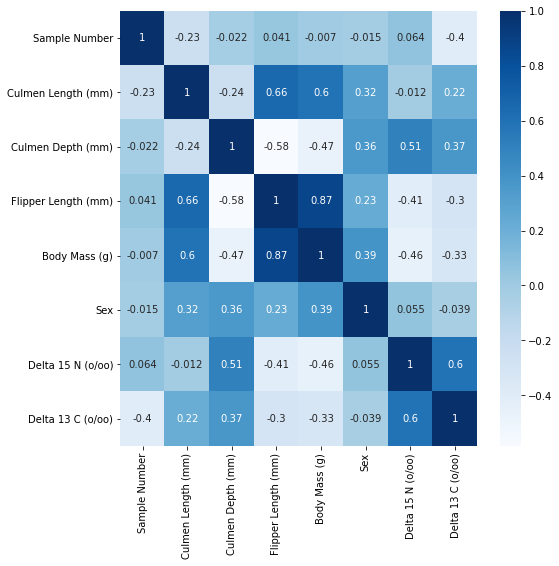

In [55]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [56]:
df.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')

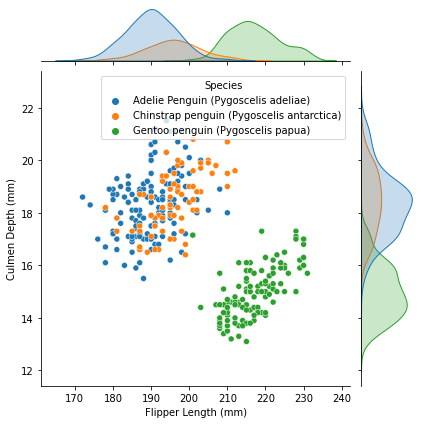

In [72]:
sns.jointplot(x='Flipper Length (mm)',y='Culmen Depth (mm)',data=df,hue='Species')

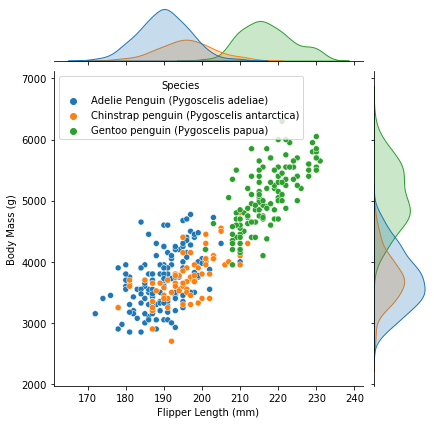

In [59]:
sns.jointplot(x='Flipper Length (mm)',y='Body Mass (g)',data=df,hue='Species')

<AxesSubplot:ylabel='Density'>

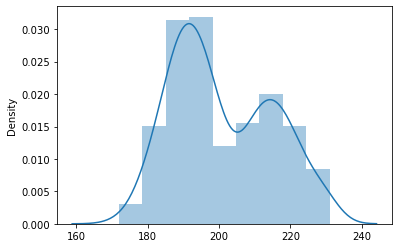

In [62]:
sns.distplot(x=df['Flipper Length (mm)'])

C:\Users\ankur.purendra\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ankur.purendra\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ankur.purendra\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

<Figure size 3600x3600 with 0 Axes>

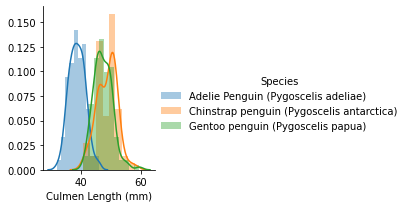

In [68]:
plt.figure(figsize=(50,50))
sns.FacetGrid(df,hue="Species").map(sns.distplot,"Culmen Length (mm)").add_legend();

C:\Users\ankur.purendra\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ankur.purendra\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ankur.purendra\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

<Figure size 3600x3600 with 0 Axes>

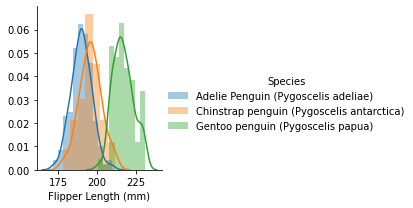

In [69]:
plt.figure(figsize=(50,50))
sns.FacetGrid(df,hue="Species").map(sns.distplot,"Flipper Length (mm)").add_legend();

C:\Users\ankur.purendra\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ankur.purendra\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ankur.purendra\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

<Figure size 3600x3600 with 0 Axes>

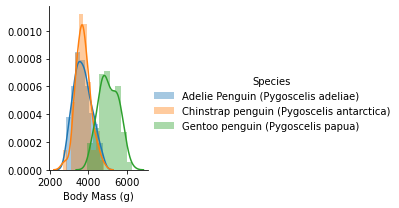

In [70]:
plt.figure(figsize=(50,50))
sns.FacetGrid(df,hue="Species").map(sns.distplot,"Body Mass (g)").add_legend();

In [71]:
df.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')

Conclusion:
1. The distribution for Culmen Length for Antarctica and Papua are identical but Adeliea is different
2. The distribution for Flipper Length is almost identical for Antarctica and Adeliea but Papua is different.
3. Body mass for Antarctica and Adelia is same wheras Antarctica Penguins have more body mass. 
    

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Species'>

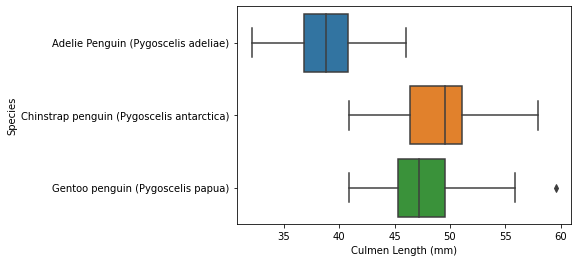

In [73]:
sns.boxplot(x='Culmen Length (mm)',y='Species',data=df)

<AxesSubplot:xlabel='Culmen Depth (mm)', ylabel='Species'>

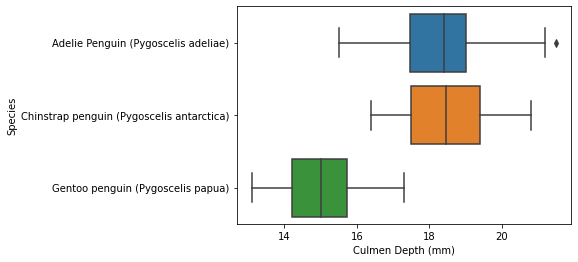

In [74]:
sns.boxplot(x='Culmen Depth (mm)',y='Species',data=df)

<AxesSubplot:xlabel='Body Mass (g)', ylabel='Species'>

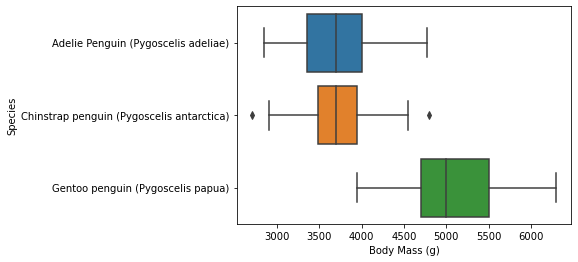

In [75]:
sns.boxplot(x='Body Mass (g)',y='Species',data=df)

<AxesSubplot:xlabel='Flipper Length (mm)', ylabel='Species'>

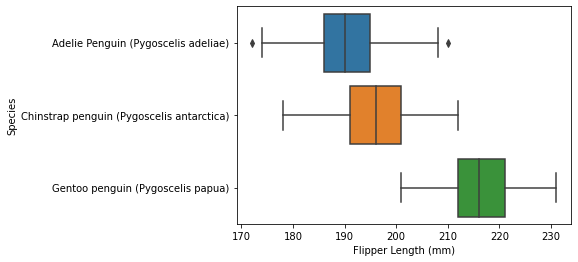

In [81]:
sns.boxplot(x='Flipper Length (mm)',y='Species',data=df)

<AxesSubplot:xlabel='Species', ylabel='Flipper Length (mm)'>

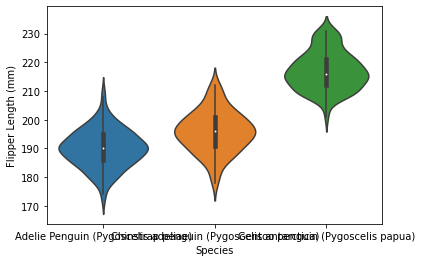

In [79]:
sns.violinplot(x='Species',y='Flipper Length (mm)',data=df,size=8)

<AxesSubplot:xlabel='Species', ylabel='Body Mass (g)'>

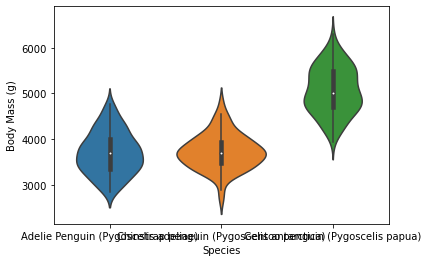

In [84]:
sns.violinplot(x='Species',y='Body Mass (g)',data=df)

<AxesSubplot:xlabel='Sex', ylabel='Body Mass (g)'>

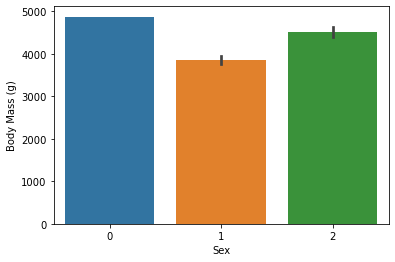

In [87]:
sns.barplot(x='Sex',y='Body Mass (g)',data=df)

<AxesSubplot:xlabel='Species', ylabel='Body Mass (g)'>

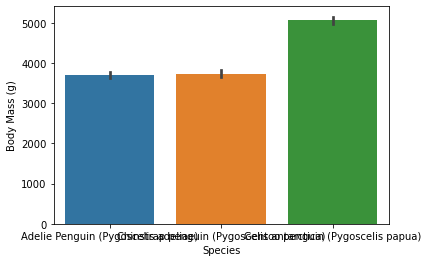

In [89]:
sns.barplot(x='Species',y='Body Mass (g)',data=df)

C:\Users\ankur.purendra\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ankur.purendra\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ankur.purendra\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 71.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


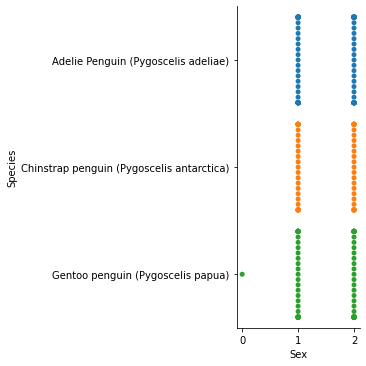

In [98]:
sns.catplot(x='Sex',y='Species',data=df,kind='swarm')